# Project 3 - Python Machine Learning

#### Importing data set 'Census Income'

In [111]:
import pandas as pd, numpy as np
census_income_df = pd.read_csv('CensusIncome.csv')
print(census_income_df.head())
print('\nDimensions of data frame:', census_income_df.shape)

   age         workclass    fnlwgt  education  education_num  \
0   39         State-gov   77516.0  Bachelors             13   
1   50  Self-emp-not-inc   83311.0  Bachelors             13   
2   38           Private  215646.0    HS-grad              9   
3   53           Private  234721.0       11th              7   
4   28           Private  338409.0  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income_level  
0        2174.0           0.0            40.0  United-States        <=50K  
1           0.0   

#### Data cleaning: removed nulls, dropped columns, changed data types

In [112]:
census_income_df = census_income_df.drop(columns=['fnlwgt','education_num'])
print('\nDimensions of data frame:', census_income_df.shape)


Dimensions of data frame: (48842, 13)


In [113]:
census_income_df = census_income_df.replace('?', np.NaN)
print(census_income_df.isnull().sum())

age                  0
workclass         2799
education            0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income_level         0
dtype: int64


In [114]:
census_income_df = census_income_df.dropna()
print(census_income_df.isnull().sum())

age               0
workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_level      0
dtype: int64


In [115]:
census_income_df.workclass = census_income_df.workclass.astype('category')
census_income_df.education = census_income_df.education.astype('category')
census_income_df.marital_status = census_income_df.marital_status.astype('category')
census_income_df.occupation = census_income_df.occupation.astype('category')
census_income_df.relationship = census_income_df.relationship.astype('category')
census_income_df.race = census_income_df.race.astype('category')
census_income_df.sex = census_income_df.sex.astype('category')
census_income_df.native_country = census_income_df.native_country.astype('category')
census_income_df.income_level = census_income_df.income_level.astype('category')

le = preprocessing.LabelEncoder()
census_income_df['workclass'] = le.fit_transform(census_income_df['workclass'])
census_income_df['education'] = le.fit_transform(census_income_df['education'])
census_income_df['marital_status'] = le.fit_transform(census_income_df['marital_status'])
census_income_df['occupation'] = le.fit_transform(census_income_df['occupation'])
census_income_df['relationship'] = le.fit_transform(census_income_df['relationship'])
census_income_df['race'] = le.fit_transform(census_income_df['race'])
census_income_df['sex'] = le.fit_transform(census_income_df['sex'])


In [116]:
print(census_income_df.dtypes, "\n")

age                  int64
workclass            int32
education            int32
marital_status       int32
occupation           int32
relationship         int32
race                 int32
sex                  int32
capital_gain       float64
capital_loss       float64
hours_per_week     float64
native_country    category
income_level      category
dtype: object 



## Data Exploration

In [132]:
census_income_df['age'].describe()

count    45222.000000
mean        38.547941
std         13.217870
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

In [133]:
census_income_df.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39,5,9,4,0,1,4,1,2174.0,0.0,40.0,United-States,<=50K
1,50,4,9,2,3,0,4,1,0.0,0.0,13.0,United-States,<=50K
2,38,2,11,0,5,1,4,1,0.0,0.0,40.0,United-States,<=50K
3,53,2,1,2,5,0,2,1,0.0,0.0,40.0,United-States,<=50K
4,28,2,9,2,9,5,2,0,0.0,0.0,40.0,Cuba,<=50K


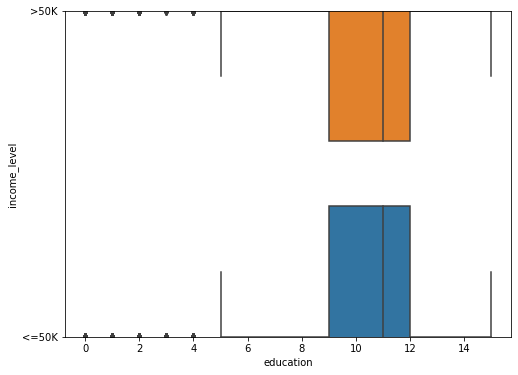

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
var = 'education'
data = pd.concat([census_income_df['income_level'], census_income_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="income_level", data=data)
fig.axis(ymin=0, ymax=1);

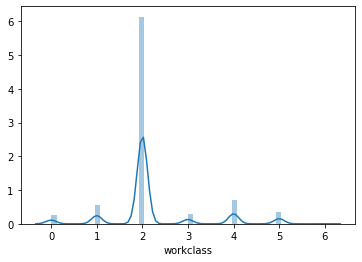

In [141]:
sns.distplot(census_income_df['workclass']);

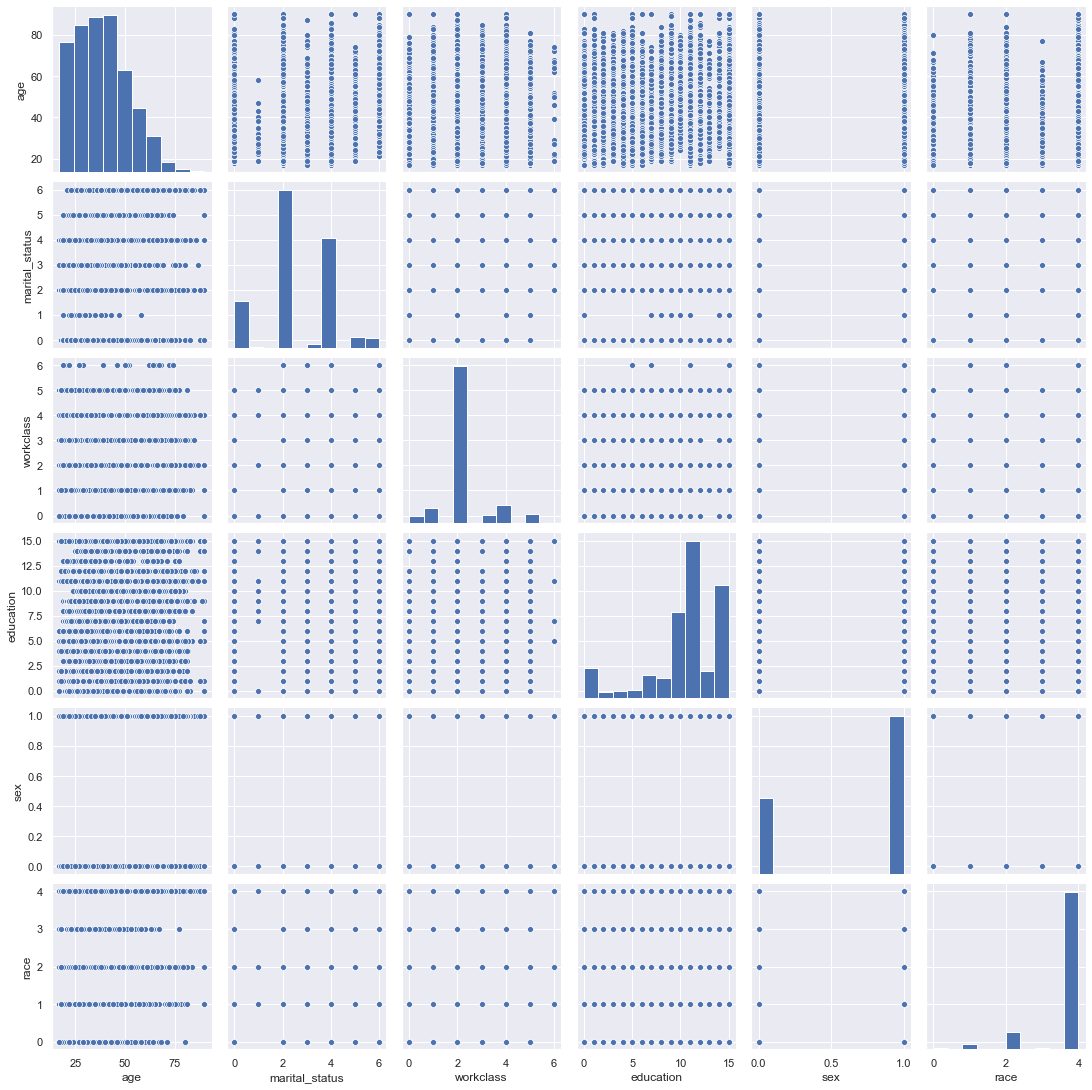

In [144]:
sns.set()
cols = ['age', 'marital_status', 'workclass', 'education', 'sex', 'race']
sns.pairplot(census_income_df[cols], height = 2.5)
plt.show();

In [145]:
census_income_df.tail()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
48836,33,2,9,4,9,3,4,1,0.0,0.0,40.0,United-States,<=50K
48837,39,2,9,0,9,1,4,0,0.0,0.0,36.0,United-States,<=50K
48839,38,2,9,2,9,0,4,1,0.0,0.0,50.0,United-States,<=50K
48840,44,2,9,0,0,3,1,1,5455.0,0.0,40.0,United-States,<=50K
48841,35,3,9,2,3,0,4,1,0.0,0.0,60.0,United-States,>50K


#### Split data into train and test sets

In [117]:
# train test split
from sklearn.model_selection import train_test_split

X = census_income_df.loc[:, ['age', 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week']]
y = census_income_df.income_level

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

print('train size:', X_train.shape)
print('test size:', X_test.shape)


train size: (27133, 11)
test size: (18089, 11)


## Logistic Regression - Algorithm # 1

In [126]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs', max_iter=40000)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.7953414661113772

#### Predicting and outputing results

In [127]:
pred = clf.predict(X_test)
# evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print('accuracy score: ', accuracy_score(y_test, pred))
print('precision score: ', precision_score(y_test, pred, pos_label='<=50K'))
print('recall score: ', recall_score(y_test, pred,  pos_label='<=50K'))
print('f1 score: ', f1_score(y_test, pred,  pos_label='<=50K'))
confusion_matrix(y_test, pred)

accuracy score:  0.7967272928298966
precision score:  0.8114157806379407
recall score:  0.9529721045713451
f1 score:  0.8765154313732074


array([[13050,   644],
       [ 3033,  1362]], dtype=int64)

## Naive Bayes - Algorithm # 2

In [128]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.7708325655106328

#### Predicting and outputting results

In [121]:
pred = clf.predict(X_test)
# evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print('accuracy score: ', accuracy_score(y_test, pred))
print('precision score: ', precision_score(y_test, pred, pos_label='<=50K'))
print('recall score: ', recall_score(y_test, pred,  pos_label='<=50K'))
print('f1 score: ', f1_score(y_test, pred,  pos_label='<=50K'))
confusion_matrix(y_test, pred)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

accuracy score:  0.7777654928409531
precision score:  0.7915611814345992
recall score:  0.9589601285234409
f1 score:  0.8672566371681416
              precision    recall  f1-score   support

       <=50K       0.79      0.96      0.87     13694
        >50K       0.63      0.21      0.32      4395

    accuracy                           0.78     18089
   macro avg       0.71      0.59      0.59     18089
weighted avg       0.75      0.78      0.73     18089



## Decision Trees - Algorithm # 3

In [122]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

#### Predicting and outputing results

In [123]:
pred = clf.predict(X_test)
# evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print('accuracy score: ', accuracy_score(y_test, pred))
print('precision score: ', precision_score(y_test, pred, pos_label='<=50K'))
print('recall score: ', recall_score(y_test, pred, pos_label='<=50K'))
print('f1 score: ', f1_score(y_test, pred, pos_label='<=50K'))
confusion_matrix(y_test, pred)

accuracy score:  0.8132013931118359
precision score:  0.8748455556363107
recall score:  0.8789981013582591
f1 score:  0.8769169125414346


array([[12037,  1657],
       [ 1722,  2673]], dtype=int64)

In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       <=50K       0.87      0.88      0.88     13694
        >50K       0.62      0.61      0.61      4395

    accuracy                           0.81     18089
   macro avg       0.75      0.74      0.74     18089
weighted avg       0.81      0.81      0.81     18089



## Random Forest - Ensemble Method # 1

In [129]:
from sklearn.ensemble import RandomForestClassifier

# train
clf2 = RandomForestClassifier(max_depth=4, random_state=1234)
clf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=1234)

In [130]:
# predict
pred2 = clf2.predict(X_test)
# evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print('accuracy score: ', accuracy_score(y_test, pred2))
print('precision score: ', precision_score(y_test, pred2, pos_label='<=50K'))
print('recall score: ', recall_score(y_test, pred2, pos_label='<=50K'))
print('f1 score: ', f1_score(y_test, pred2, pos_label='<=50K'))
confusion_matrix(y_test, pred2)
# evaluate
print(classification_report(y_test, pred2))

accuracy score:  0.8172369948587539
precision score:  0.8070828899136809
recall score:  0.9968599386592668
f1 score:  0.8919890224777836
              precision    recall  f1-score   support

       <=50K       0.81      1.00      0.89     13694
        >50K       0.96      0.26      0.41      4395

    accuracy                           0.82     18089
   macro avg       0.89      0.63      0.65     18089
weighted avg       0.85      0.82      0.77     18089



## Analysis

Comparing these different algorithms in R versus Python definitely yielded at different results, proving that R ran better when it came to classification data sets/algorithms.

To start off with, Logistic Regression had an accuracy of 79% in Python, whereas in R it had an accuracy rate of 84%. Although the difference is minute, the change in accuracy shows alot about the algorithms running on different languages. In addition to the first algorithm, Naive Bayes also ran at a different accuracy of 77% whereas in R, it was 81%. Lastly, the difference between decision trees in both platforms was the least different, with 81% accuracy in Python and 83% in R. 

However, similar to R, the three algorithms were close in their ranking. Decision trees ran the best accuracy rate, followed by Logisitic Regression and then finally Naive Bayes, which performed the worst in both scenarios.

I believe this performance was relatively expected. Decision Trees have always been efficient with classification datasets as they use greedy, recursive methods on their data, which leads to a faster and more accurate result. Logisitic regression, has always been a natural classification algorithm, therefore, having it execute on a dataset that is obviously binomial was expected. Although its performance was not surpassing that in the R scripts, it still had a pretty good accuracy and precision score. 

#### Personal Analysis

Personally, I felt that with my lack of prior experience with Python, I definitely prefer the R script more. There are parts of python that ran more efficiently, such as how quick it was to run the algorithms, how fast it was at generating graphs, etc. However, the R scripts ran and showed efficient predictors and features such as the residual deviance, which lacked in the python version of the algorithms. However, R is definitely a lot slower when it comes to data analysis. However, as stated in the previous paragraph, R performance was significantly better than that of Python's. Each algorithm's accuracy ran a few percents ahead that of Python's. Explanation: To start off with, Logistic Regression had an accuracy of 79% in Python, whereas in R it had an accuracy rate of 84%. Although the difference is minute, the change in accuracy shows alot about the algorithms running on different languages. In addition to the first algorithm, Naive Bayes also ran at a different accuracy of 77% whereas in R, it was 81%. Lastly, the difference between decision trees in both platforms was the least different, with 81% accuracy in Python and 83% in R. 
